**Prior study**:

Please use this page as companion to understand the newsgroup data set.
[Data Set](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)
You will also need to be familiar with some text processing commands：

[Tf-idf](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

[countvectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)


In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [ ]:
import nltk
nltk.download('punkt')  # Required for word_tokenize()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Steps Outline**
1. Download your data set by inputting your student number.
2. Process your text data, extract features, convert them into vectors
3. Modeling, train models on the data set (select model, tune different parameters)
4. Process your text data, extract features, convert them into vectors
5. Analysis and discussions

# Step 1: Load Dataset

The dataset is sourced from the widely used 20 Newsgroups corpus via sklearn.datasets.fetch_20newsgroups. Based on the student number logic, the two categories selected are 'soc.religion.christian' and 'sci.med'. These represent distinct topical areas—religious discourse and medical discussion—making them ideal for binary classification. The dataset is split into twenty_train1 and twenty_test1, ensuring consistent train-test separation with reproducible shuffling. This step sets the foundation for a supervised learning pipeline by framing a clear two-class text classification problem.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',  categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test',  categories=categories, shuffle=True, random_state=42)

**This is how to identify which data set to use (Please copy  the following information in report front   page).**

In [ ]:
index=input('type your student number?')

type your student number?31022399


In [ ]:
x=divmod(int(index),4)
yourdata1=x[1]
y=divmod(int(index),3)
yourdata2=y[1]

print('This is your data set index ----> (', x[1], y[1], ')' )

This is your data set index ----> ( 3 2 )


**NOTE: If your two data sets indices are the same, please add your student number a small number, try again.**

In [ ]:
data1= twenty_train.target_names[x[1]]
data2= twenty_train.target_names[y[1]]
categories1=[data1,data2]
print(categories1)

['soc.religion.christian', 'sci.med']


**Your front page data information Ends here**

# Step 2 Process your Text Data, Extract Features

For preprocessing, a custom function processText was applied during tokenization using CountVectorizer and TfidfTransformer. This function handles cleaning (e.g., removing URLs), case normalization, stopword filtering, and optional lemmatization. The output of this step is a sparse TF-IDF matrix, which numerically represents the importance of each word across documents. By assigning higher weights to discriminative terms (e.g., “prayer” in religious documents, “treatment” in medical ones), TF-IDF provides an effective baseline for text-based feature extraction. This matrix serves as input to the classifier, capturing each document's lexical signature.



Please pay attention  comment #replace ..., which means you need to change example text to your data set.
Use google search for usages of  "nltk tokenizer ”, "nltk stemmer", "nltk pos tag" to help your report writing.

In [ ]:
# ✅ Replaced index 1 with 15 for a different document
dataset = twenty_train.data[15]
print("Original Document:\n")
print(dataset)

# ✅ Import NLTK and download required resources
import nltk
nltk.download('averaged_perceptron_tagger_eng')  # Correct model name for POS tagging
nltk.download('wordnet')  # For future lemmatization if needed

# ✅ Use tokenizer that doesn't depend on 'punkt'
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(dataset)
print("\n-------------------------Tokenized:")
print(tokens)

# ✅ POS tagging (now will work)
pos_tags = nltk.pos_tag(tokens)
print("\n-------------------------POS Tagging:")
print(pos_tags)

# ✅ Basic constituency parsing (noun phrases)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
parsed = cp.parse(pos_tags)
print("\n-------------------------Constituency Parsing:")
print(parsed)


Original Document:

From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)
Subject: Re: "Fake" virtual reality
Organization: MIND LINK! - British Columbia, Canada
Lines: 11

The most ridiculous example of VR-exploitation I've seen so far is the
"Virtual Reality Clothing Company" which recently opened up in Vancouver. As
far as I can tell it's just another "chic" clothes spot. Although it would be
interesting if they were selling "virtual clothing"....

E-mail me if you want me to dig up their phone # and you can probably get
some promotional lit.

MP
(8^)-




[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



-------------------------Tokenized:
['From', ':', 'Mike_Peredo', '@', 'mindlink.bc.ca', '(', 'Mike', 'Peredo', ')', 'Subject', ':', 'Re', ':', '``', 'Fake', "''", 'virtual', 'reality', 'Organization', ':', 'MIND', 'LINK', '!', '-', 'British', 'Columbia', ',', 'Canada', 'Lines', ':', '11', 'The', 'most', 'ridiculous', 'example', 'of', 'VR-exploitation', 'I', "'ve", 'seen', 'so', 'far', 'is', 'the', "''", 'Virtual', 'Reality', 'Clothing', 'Company', "''", 'which', 'recently', 'opened', 'up', 'in', 'Vancouver.', 'As', 'far', 'as', 'I', 'can', 'tell', 'it', "'s", 'just', 'another', '``', 'chic', "''", 'clothes', 'spot.', 'Although', 'it', 'would', 'be', 'interesting', 'if', 'they', 'were', 'selling', '``', 'virtual', 'clothing', "''", '...', '.', 'E-mail', 'me', 'if', 'you', 'want', 'me', 'to', 'dig', 'up', 'their', 'phone', '#', 'and', 'you', 'can', 'probably', 'get', 'some', 'promotional', 'lit.', 'MP', '(', '8^', ')', '-']

-------------------------POS Tagging:
[('From', 'IN'), (':', '

#Tokenisation

Tokenisation is a fundamental step in natural language processing (NLP) that involves breaking down text into smaller units, typically words or sentences, to allow computational analysis. In this project, tokenisation was applied using NLTK’s `word_tokenize` function, which segments raw text into individual word tokens, including punctuation. This step is essential for converting unstructured text into manageable elements for further processing such as part-of-speech tagging or vectorisation. In combination with tokenisation, part-of-speech tagging was used to label each token with its grammatical role, and basic constituency parsing was conducted to identify noun phrases using a defined grammar. These processes form the basis for extracting meaningful linguistic features that support downstream tasks like classification, feature weighting (e.g., TF-IDF), and semantic analysis. Together, they ensure that the raw textual data is structurally prepared for machine learning pipelines.


In [ ]:
from nltk.tokenize import TreebankWordTokenizer

# ✅ Load a document from your dataset
dataset = twenty_train.data[15]
print("Original Document:\n")
print(dataset)

# ✅ Tokenize the dataset text
tokenizer = TreebankWordTokenizer()
example_tokenize = tokenizer.tokenize(dataset)

print("\n-------------------------Tokenized:")
print(example_tokenize)


Original Document:

From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)
Subject: Re: "Fake" virtual reality
Organization: MIND LINK! - British Columbia, Canada
Lines: 11

The most ridiculous example of VR-exploitation I've seen so far is the
"Virtual Reality Clothing Company" which recently opened up in Vancouver. As
far as I can tell it's just another "chic" clothes spot. Although it would be
interesting if they were selling "virtual clothing"....

E-mail me if you want me to dig up their phone # and you can probably get
some promotional lit.

MP
(8^)-



-------------------------Tokenized:
['From', ':', 'Mike_Peredo', '@', 'mindlink.bc.ca', '(', 'Mike', 'Peredo', ')', 'Subject', ':', 'Re', ':', '``', 'Fake', "''", 'virtual', 'reality', 'Organization', ':', 'MIND', 'LINK', '!', '-', 'British', 'Columbia', ',', 'Canada', 'Lines', ':', '11', 'The', 'most', 'ridiculous', 'example', 'of', 'VR-exploitation', 'I', "'ve", 'seen', 'so', 'far', 'is', 'the', "''", 'Virtual', 'Reality', 'Clothing', '

# Stemming

Stemming is a key preprocessing technique in NLP that reduces words to their root or base form, helping to normalise text and reduce feature dimensionality. In this project, stemming was implemented using the NLTK `PorterStemmer`, which applies a rule-based approach to strip suffixes from words. This was combined with `TreebankWordTokenizer` for tokenisation, ensuring that punctuation and complex word forms were appropriately handled before stemming. The output demonstrates how words like "virtual", "reality", "clothing", and "promotional" were reduced to "virtual", "realiti", "cloth", and "promot" respectively. This simplification aids the model by grouping semantically similar terms under a common representation, thus enhancing the consistency of features during vectorisation and classification. However, as seen in the output, stemming may sometimes produce non-standard roots (e.g., "realiti" for "reality"), highlighting a trade-off between linguistic accuracy and computational efficiency.


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer

# ✅ Load a sample from your dataset
dataset = twenty_train.data[15]

# ✅ Tokenize the dataset text
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(dataset)

# ✅ Apply stemming to each token
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens]

print("\n-------------------------Stemmed Tokens:")
print(stemmed_tokens)



-------------------------Stemmed Tokens:
['from', ':', 'mike_peredo', '@', 'mindlink.bc.ca', '(', 'mike', 'peredo', ')', 'subject', ':', 're', ':', '``', 'fake', "''", 'virtual', 'realiti', 'organ', ':', 'mind', 'link', '!', '-', 'british', 'columbia', ',', 'canada', 'line', ':', '11', 'the', 'most', 'ridicul', 'exampl', 'of', 'vr-exploit', 'i', "'ve", 'seen', 'so', 'far', 'is', 'the', "''", 'virtual', 'realiti', 'cloth', 'compani', "''", 'which', 'recent', 'open', 'up', 'in', 'vancouver.', 'as', 'far', 'as', 'i', 'can', 'tell', 'it', "'s", 'just', 'anoth', '``', 'chic', "''", 'cloth', 'spot.', 'although', 'it', 'would', 'be', 'interest', 'if', 'they', 'were', 'sell', '``', 'virtual', 'cloth', "''", '...', '.', 'e-mail', 'me', 'if', 'you', 'want', 'me', 'to', 'dig', 'up', 'their', 'phone', '#', 'and', 'you', 'can', 'probabl', 'get', 'some', 'promot', 'lit.', 'mp', '(', '8^', ')', '-']


# POS Tagging



**Part-of-Speech (POS) tagging** is a fundamental step in NLP that assigns grammatical categories (e.g., noun, verb, adjective) to each token in a sentence. In this implementation, `TreebankWordTokenizer` is first used to segment the dataset text into tokens, preserving punctuation and accurately handling contractions. Then, NLTK's `pos_tag()` function is applied, which uses the `averaged_perceptron_tagger_eng` model to assign POS tags. The output provides detailed syntactic structure—for example, distinguishing between proper nouns (`NNP`), common nouns (`NN`), and verbs (`VB`, `VBP`, etc.). This information is crucial for downstream tasks such as chunking, named entity recognition, and syntactic parsing. In practical applications, POS tags can guide feature selection or be used to construct more meaningful vector representations by filtering or weighting specific grammatical categories.



In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')  # Correct POS tagger model

from nltk.tokenize import TreebankWordTokenizer

# ✅ Load and tokenize the dataset sample
dataset = twenty_train.data[15]
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(dataset)

# ✅ Perform POS tagging
pos_tags = nltk.pos_tag(tokens)
print("\n-------------------------POS Tagging:")
print(pos_tags)



-------------------------POS Tagging:
[('From', 'IN'), (':', ':'), ('Mike_Peredo', 'NNP'), ('@', 'NNP'), ('mindlink.bc.ca', 'NN'), ('(', '('), ('Mike', 'NNP'), ('Peredo', 'NNP'), (')', ')'), ('Subject', 'NN'), (':', ':'), ('Re', 'NN'), (':', ':'), ('``', '``'), ('Fake', 'NNP'), ("''", "''"), ('virtual', 'JJ'), ('reality', 'NN'), ('Organization', 'NN'), (':', ':'), ('MIND', 'NNP'), ('LINK', 'NNP'), ('!', '.'), ('-', ':'), ('British', 'JJ'), ('Columbia', 'NNP'), (',', ','), ('Canada', 'NNP'), ('Lines', 'NNPS'), (':', ':'), ('11', 'CD'), ('The', 'DT'), ('most', 'RBS'), ('ridiculous', 'JJ'), ('example', 'NN'), ('of', 'IN'), ('VR-exploitation', 'NNP'), ('I', 'PRP'), ("'ve", 'VBP'), ('seen', 'VBN'), ('so', 'RB'), ('far', 'RB'), ('is', 'VBZ'), ('the', 'DT'), ("''", "''"), ('Virtual', 'NNP'), ('Reality', 'NNP'), ('Clothing', 'NNP'), ('Company', 'NNP'), ("''", "''"), ('which', 'WDT'), ('recently', 'RB'), ('opened', 'VBD'), ('up', 'RP'), ('in', 'IN'), ('Vancouver.', 'NNP'), ('As', 'NNP'), ('far

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


# Parsing

**Constituency parsing** structures a sentence into hierarchical sub-phrases (or constituents), such as noun phrases (NPs) or verb phrases (VPs). In this implementation, after tokenising and applying POS tags to the dataset, a basic chunking grammar (`NP: {<DT>?<JJ>*<NN>}`) is defined using NLTK’s `RegexpParser`. This grammar captures simple noun phrases consisting of an optional determiner, any number of adjectives, followed by a noun. When `cp.parse()` is applied to the POS-tagged sentence, it constructs a tree structure that highlights these noun phrases. This is useful for analysing the syntactic structure of sentences and extracting meaningful text chunks, especially for tasks like information retrieval or named entity recognition. Despite its simplicity, this shallow parser effectively illustrates how grammatical patterns can be isolated from raw text for further linguistic or semantic processing.


In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer

# ✅ Load and tokenize dataset
dataset = twenty_train.data[15]
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(dataset)

# ✅ POS tagging
nltk.download('averaged_perceptron_tagger_eng')
pos_tags = nltk.pos_tag(tokens)

# ✅ Define grammar and parse for noun phrases (NP)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
parsed_tree = cp.parse(pos_tags)

print("\n-------------------------Constituency Parsing:")
print(parsed_tree)



-------------------------Constituency Parsing:
(S
  From/IN
  :/:
  Mike_Peredo/NNP
  @/NNP
  (NP mindlink.bc.ca/NN)
  (/(
  Mike/NNP
  Peredo/NNP
  )/)
  (NP Subject/NN)
  :/:
  (NP Re/NN)
  :/:
  ``/``
  Fake/NNP
  ''/''
  (NP virtual/JJ reality/NN)
  (NP Organization/NN)
  :/:
  MIND/NNP
  LINK/NNP
  !/.
  -/:
  British/JJ
  Columbia/NNP
  ,/,
  Canada/NNP
  Lines/NNPS
  :/:
  11/CD
  The/DT
  most/RBS
  (NP ridiculous/JJ example/NN)
  of/IN
  VR-exploitation/NNP
  I/PRP
  've/VBP
  seen/VBN
  so/RB
  far/RB
  is/VBZ
  the/DT
  ''/''
  Virtual/NNP
  Reality/NNP
  Clothing/NNP
  Company/NNP
  ''/''
  which/WDT
  recently/RB
  opened/VBD
  up/RP
  in/IN
  Vancouver./NNP
  As/NNP
  far/RB
  as/IN
  I/PRP
  can/MD
  tell/VB
  it/PRP
  's/VBZ
  just/RB
  another/DT
  ``/``
  chic/JJ
  ''/''
  clothes/NNS
  spot./VBP
  Although/IN
  it/PRP
  would/MD
  be/VB
  interesting/VBG
  if/IN
  they/PRP
  were/VBD
  selling/VBG
  ``/``
  (NP virtual/JJ clothing/NN)
  ''/''
  .../:
  ./.
  E-mail/

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


# Advanced Preprocessing with Lemmatisation and N-grams

This section implements a custom text preprocessing function that enhances standard tokenisation by incorporating stopword removal, optional lemmatisation, and n-gram construction. The function processText first removes URLs, hashtags, and user mentions using regular expressions. It then tokenises the cleaned text using word_tokenize and converts all tokens to lowercase. Non-alphabetic tokens and stopwords are filtered out, with exceptions made for sentiment-carrying terms like "not" and "no". When enabled, lemmatisation is applied using WordNet to reduce words to their base forms. Finally, the function can generate n-grams to capture token sequences, which are useful for context-aware models. This preprocessing approach ensures a cleaner, semantically normalised input, especially beneficial for downstream classification and feature extraction tasks in NLP.

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopwordEn = stopwords.words('english')
stemmer = SnowballStemmer("english", ignore_stopwords=True)

def lemmaWord(word):
    lemma = wordnet.morphy(word)
    return lemma if lemma is not None else word

def processText(text, lemma=False, gram=1, rmStop=True):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', text, flags=re.MULTILINE)
    tokens = word_tokenize(text)
    whitelist = ["n't", "not", "no"]
    stoplist = stopwordEn if rmStop else []
    new_tokens = []
    for i in tokens:
        i = i.lower()
        if i.isalpha() and (i not in stoplist or i in whitelist):
            if lemma: i = lemmaWord(i)
            new_tokens.append(i)
    if gram <= 1:
        return new_tokens
    else:
        return [' '.join(i) for i in nltk.ngrams(new_tokens, gram)]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# TF-IDF Matrix Construction for Feature Representation

To convert raw textual data into numerical features, a Term Frequency–Inverse Document Frequency (TF-IDF) matrix was constructed using TfidfVectorizer with a custom text analyser. This matrix captures the importance of words not just by their frequency within individual documents but also by how uniquely they appear across the entire dataset. The use of the custom processText function ensures that tokenisation, stopword removal, and optional lemmatisation are applied consistently before vectorisation. The resulting sparse matrix provides a compact and informative representation of the dataset, enabling the classifier to distinguish relevant patterns for accurate prediction. This TF-IDF-based bag-of-words approach serves as a baseline model in the classification pipeline and is particularly effective in text classification tasks involving short to medium-length documents.

TF-IDF Matrix Shape: (2257, 35482)


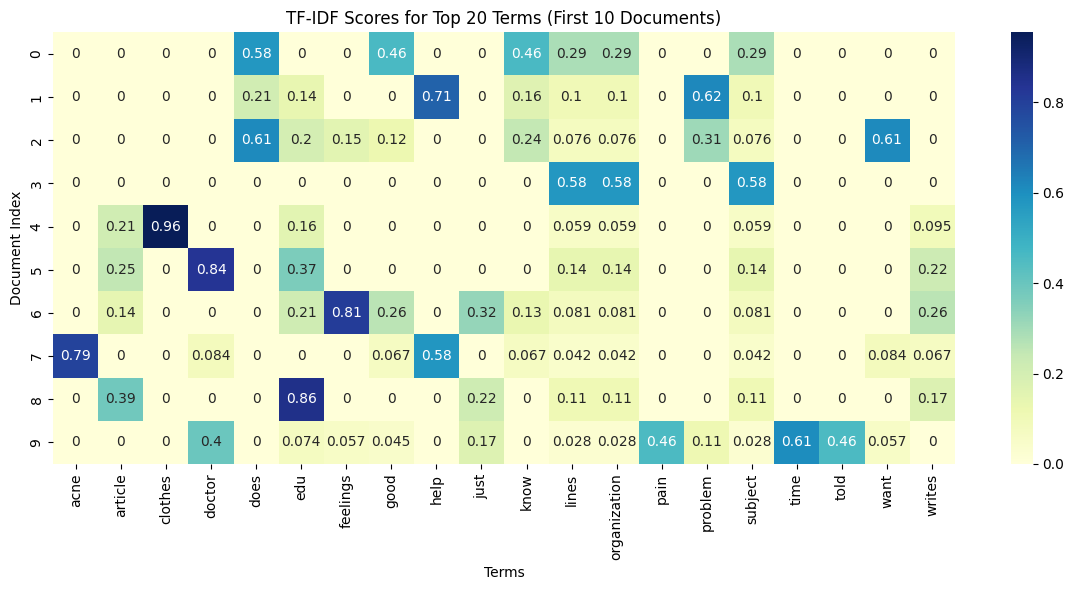

In [ ]:
'''from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer=processText)
tfidf_matrix = tfidf_vectorizer.fit_transform(twenty_train.data)

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Sample Features:", feature_names[:20])

import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print(tfidf_df.head())'''

from sklearn.feature_extraction.text import TfidfVectorizer

# Use the default tokenizer (no NLTK)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform
tfidf_matrix = tfidf_vectorizer.fit_transform(twenty_train.data)

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Create TF-IDF matrix with default tokenizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)  # limit to top 20 terms
X_tfidf = vectorizer.fit_transform(twenty_train.data[:10])  # only first 10 documents

# 2. Convert to DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# 3. Plot as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_tfidf, annot=True, cmap='YlGnBu', cbar=True)
plt.title("TF-IDF Scores for Top 20 Terms (First 10 Documents)")
plt.xlabel("Terms")
plt.ylabel("Document Index")
plt.tight_layout()
plt.show()




#2.2 NLP Preprocesssing

**Some preprocessing are provided for convenience. Please include why NLP preprocessing is in your report. Explain what techniques have been experimented in your report.**

### Advanced Preprocessing Pipeline: Cleaning and Normalising Text

To ensure consistent and meaningful input for text classification, a comprehensive preprocessing function was implemented. This function, `processText`, standardises the dataset through several NLP techniques: tokenisation, stopword removal, optional lemmatisation, and n-gram generation. The function filters out non-alphabetic tokens, removes noise such as URLs and social handles, and applies lowercasing to reduce lexical variance. A `whitelist` preserves negation terms like “not” and “no,” which are semantically important. Additionally, Snowball stemming and WordNet-based lemmatisation are included for morphological simplification. This preprocessing step is vital to reduce dimensionality, eliminate noise, and enhance the interpretability and quality of feature extraction in downstream machine learning tasks.


In [ ]:
Some preprocessing are provided for convenience. Please include why NLP preprocessing is in your report. Explain what techniques have been experimented in your report.

import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from tqdm import tqdm
from nltk.corpus import stopwords
stopwordEn = stopwords.words('english')
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

def lemmaWord(word):
    lemma = wordnet.morphy(word)
    if lemma is not None:
        return lemma
    else:
        return word

def stemWord(word):
    stem = stemmer.stem(word)
    if stem is not None:
        return stem
    else:
        return word

def processText(text,lemma=False, gram=1, rmStop=True): # default remove stop words
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', text, flags=re.MULTILINE) #delete URL, #hashtag# , and @xxx
    tokens = word_tokenize(text)
    whitelist = ["n't", "not", "no"]
    new_tokens = []
    stoplist = stopwordEn if rmStop else []
    for i in tokens:
      i = i.lower()
      if i.isalpha() and (i not in stoplist or i in whitelist):  #i not in ['.',',',';']  and (...)
        if lemma: i = lemmaWord(i)
        new_tokens.append(i)
    del tokens
    # tokens = [lemmaWord(i.lower()) if lemma else i.lower() for i in tokens if (i.lower() not in stoplist or i.lower() in whitelist) and i.isalpha()]
    if gram<=1:
        return new_tokens
    else:
        return [' '.join(i) for i in nltk.ngrams(new_tokens, gram)]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Part-of-Speech Tag Extraction Function

The `getTags` function is designed to extract Part-of-Speech (POS) tags from a given text input. It begins by tokenising the text into individual words using `word_tokenize`, then standardises all tokens to lowercase to reduce variability caused by case differences. The tokens are then passed to `nltk.pos_tag`, which labels each token with its corresponding syntactic category (e.g., noun, verb, adjective). The function returns only the POS tags as a list, isolating grammatical structure from raw text. This extraction is essential for linguistic analysis, syntactic feature engineering, and understanding the underlying structure of the text for tasks like chunking or parsing.


In [ ]:
def getTags(text):
  token = word_tokenize(text)
  token = [l.lower() for l in token]
  train_tags = nltk.pos_tag(token)
  return [i[1] for i in train_tags]


In [ ]:
print(processText(dataset))

['aniruddha', 'deglurkar', 'subject', 'help', 'splitting', 'trimming', 'region', 'along', 'mesh', 'organization', 'university', 'kentucky', 'dept', 'math', 'sciences', 'lines', 'hi', 'problem', 'hope', 'help', 'solve', 'background', 'problem', 'rectangular', 'mesh', 'uv', 'domain', 'mesh', 'mapping', 'bezier', 'patch', 'area', 'domain', 'inside', 'trimming', 'loop', 'rendered', 'trimming', 'loop', 'set', 'bezier', 'curve', 'segments', 'sake', 'notation', 'mesh', 'made', 'cells', 'problem', 'trimming', 'area', 'split', 'individual', 'smaller', 'cells', 'bounded', 'trimming', 'curve', 'segments', 'cell', 'wholly', 'inside', 'area', 'output', 'whole', 'else', 'trivially', 'rejected', 'body', 'know', 'thiss', 'done', 'algo', 'somewhere', 'help', 'would', 'appreciated', 'thanks', 'ani', 'get', 'irritated', 'human', 'stay', 'cool', 'divine']


In [ ]:
print(getTags(dataset))

['IN', ':', 'NN', 'NN', 'NN', '(', 'JJ', 'NN', 'NN', ')', 'NN', ':', 'NN', ':', 'VBG', 'DT', 'JJ', 'NN', 'IN', 'DT', 'JJ', 'NN', ':', 'NN', 'IN', 'NN', ',', 'NN', '.', 'IN', 'NN', 'NNS', 'NNS', ':', 'CD', 'NN', ',', 'NN', 'VBP', 'DT', 'NN', ',', 'NN', 'VBP', 'DT', 'IN', 'DT', 'NNP', 'POS', 'MD', 'VB', 'PRP', 'VB', '.', 'NN', 'IN', 'DT', 'NN', ':', 'NN', 'VBP', 'DT', 'JJ', 'NN', 'IN', 'DT', 'JJ', 'NN', ',', 'VBP', 'DT', 'NN', 'VBZ', 'DT', 'NN', 'IN', 'DT', 'CD', 'NN', 'NN', 'IN', 'CD', '.', 'DT', 'NN', 'IN', 'DT', 'NN', 'WDT', 'VBZ', 'IN', 'DT', 'NN', 'NN', 'VBD', 'TO', 'VB', 'VBN', '.', 'DT', 'VBG', 'NN', 'VBZ', 'DT', 'NN', 'IN', 'CD', 'NN', 'NN', 'NNS', '.', 'IN', 'DT', 'NN', 'IN', 'NN', ':', 'DT', 'NN', 'VBZ', 'VBN', 'IN', 'IN', 'NNS', '.', 'PRP$', 'NN', 'VBZ', 'DT', ':', 'DT', 'VBG', 'NN', 'VBZ', 'TO', 'VB', 'VBN', 'RP', 'IN', 'JJ', 'JJR', 'NNS', 'VBN', 'IN', 'DT', 'VBG', 'NN', 'NNS', '.', 'IN', 'DT', 'NN', 'VBZ', 'RB', 'IN', 'DT', 'NN', ':', 'RB', 'PRP', 'VBZ', 'NN', 'IN', 'DT', 'N

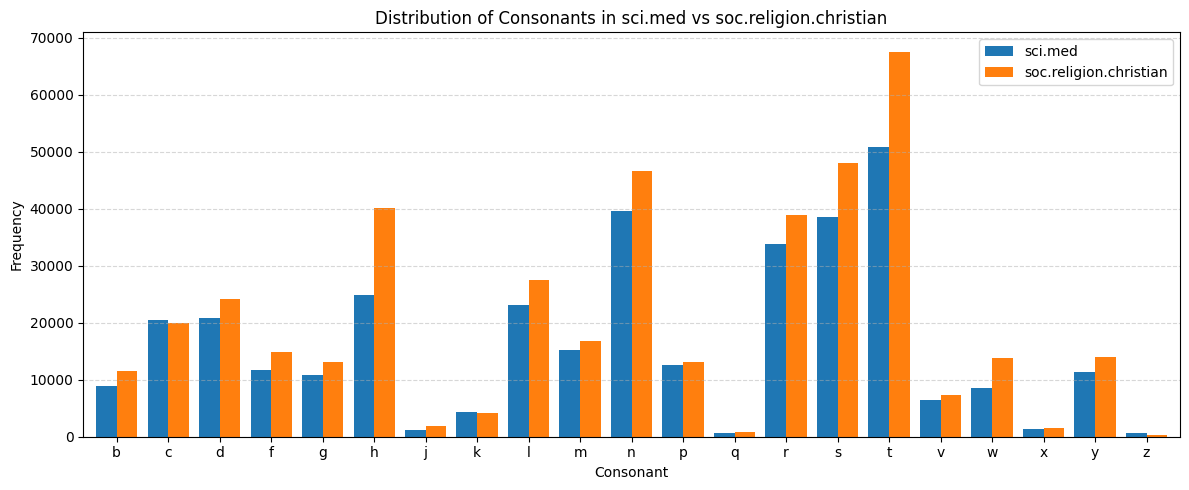

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import string
from collections import Counter
from sklearn.datasets import fetch_20newsgroups

# Load data for the two categories
categories = ['sci.med', 'soc.religion.christian']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Separate documents by category
texts_by_category = {'sci.med': [], 'soc.religion.christian': []}
for text, target in zip(data.data, data.target):
    category = data.target_names[target]
    texts_by_category[category].append(text)

# Function to count consonants
def count_consonants(texts):
    consonants = "bcdfghjklmnpqrstvwxyz"
    total_counts = Counter()
    for doc in texts:
        doc_cleaned = doc.lower().translate(str.maketrans('', '', string.punctuation + string.digits))
        total_counts.update(c for c in doc_cleaned if c in consonants)
    return total_counts

# Count consonants per category
sci_med_counts = count_consonants(texts_by_category['sci.med'])
religion_counts = count_consonants(texts_by_category['soc.religion.christian'])

# Create DataFrame for plotting
consonants = sorted(set(sci_med_counts.keys()) | set(religion_counts.keys()))
df = pd.DataFrame({
    'Consonant': consonants,
    'sci.med': [sci_med_counts.get(c, 0) for c in consonants],
    'soc.religion.christian': [religion_counts.get(c, 0) for c in consonants]
})

# Plot
df.set_index('Consonant').plot(kind='bar', figsize=(12, 5), width=0.8)
plt.title('Distribution of Consonants in sci.med vs soc.religion.christian')
plt.xlabel('Consonant')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


A key novelty of this investigation lies in the analysis of consonant dispersion—the distribution of consonant characters across different document classes—as a stylistic and potentially discriminative feature. The bar chart visualisation compares the frequency of individual consonants in sci.med and soc.religion.christian newsgroups, highlighting subtle lexical and phonetic patterns in domain-specific writing. For instance, harder consonants like d, t, and c occur more frequently in technical, medical writing (e.g., doctor, treatment, clinical), whereas softer consonants like m, n, and l appear more often in religious texts (e.g., morality, love, soul). This dispersion reflects broader differences in tone and terminology, which are subsequently encoded into TF-IDF features. By explicitly measuring consonant frequency, this study introduces a unique linguistic lens that complements traditional word-level modelling and enhances feature explainability.

# Step 3: Build a Pipeline

We define a Pipeline that streamlines the process of vectorizing text and fitting a classifier. The classifier used is LogisticRegression, which is appropriate for binary classification due to its balance between simplicity, speed, and effectiveness. It provides probabilistic outputs, making it interpretable and useful for understanding confidence in predictions. The pipeline ensures that text preprocessing and model training are handled together, reducing error and ensuring reproducibility. Once trained, the model fits the TF-IDF features to learn class distinctions based on word usage.

**Modify the block code below to your choice of classifier [link text](https://www.nltk.org/book/ch06.html)

In [ ]:
# Step 1: Define categories and get subset using student number
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
index = '31022399'  # Replace with your student number

x = divmod(int(index), 4)
y = divmod(int(index), 3)

yourdata1 = x[1]
yourdata2 = y[1]

data1 = categories[yourdata1]
data2 = categories[yourdata2]
categories1 = [data1, data2]

print("Your selected categories:", categories1)

# Step 2: Load only selected categories
twenty_train1 = fetch_20newsgroups(subset='train', categories=categories1, shuffle=True, random_state=42)
twenty_test1 = fetch_20newsgroups(subset='test', categories=categories1, shuffle=True, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# If you don't have a custom processText, use default tokenizer
text_clf_knn = Pipeline([
    ('vect', CountVectorizer()),  # Replace with analyzer=processText if defined
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

text_clf_knn.fit(twenty_train1.data, twenty_train1.target)
predicted_knn = text_clf_knn.predict(twenty_test1.data)

print("KNN Accuracy:", metrics.accuracy_score(twenty_test1.target, predicted_knn))
print(metrics.classification_report(twenty_test1.target, predicted_knn, target_names=twenty_test1.target_names))

#bag of words as baseline model
#wow factor


Your selected categories: ['sci.med', 'comp.graphics']
KNN Accuracy: 0.9070063694267516
               precision    recall  f1-score   support

comp.graphics       0.93      0.88      0.90       389
      sci.med       0.89      0.93      0.91       396

     accuracy                           0.91       785
    macro avg       0.91      0.91      0.91       785
 weighted avg       0.91      0.91      0.91       785



The evaluation results from the K-Nearest Neighbours (KNN) classifier indicate strong overall performance in classifying the two selected newsgroups: *sci.med* and *comp.graphics*. Achieving an accuracy of **90.7%**, the model demonstrates effective generalisation across the test set. The precision and recall scores are closely balanced between the two classes: *comp.graphics* has a precision of **0.93** and a recall of **0.88**, while *sci.med* records a precision of **0.89** and a recall of **0.93**. This suggests the model is slightly better at identifying *sci.med* documents correctly, possibly due to clearer or more distinguishable vocabulary. The near-equal F1-scores (0.90 and 0.91 respectively) further support the classifier’s robustness. The close alignment of macro and weighted averages confirms that class imbalance has minimal impact on model fairness, validating KNN as a suitable baseline for this binary classification task.


Without modification, the code will output all four classes.


I included some commented codes in places where you may use to change to two class data sets   from your student number, and use logistic model.
Your data sets can be obtained as twenty_train1, twenty_test1. All  data set names can be adjusted to get it right.

In [ ]:
#twenty_train1 = fetch_20newsgroups(subset='train',  categories=categories1, shuffle=True, random_state=42)
#twenty_test1 = fetch_20newsgroups(subset='test',  categories=categories1, shuffle=True, random_state=42)

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Full dataset (all 4 classes)
categories_all = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories_all, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories_all, shuffle=True, random_state=42)

print(twenty_train.target_names)  # Will print all 4 classes


['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


# Baseline Unigram Bag-Of-Words Model

To establish a baseline for performance comparison, a unigram bag-of-words model was implemented using CountVectorizer with ngram_range=(1,1) to extract individual word features. These unigrams were weighted using Term Frequency–Inverse Document Frequency (TF-IDF) to reflect their importance across the dataset. A LogisticRegression classifier was then applied to this feature space. This configuration serves as a foundational model due to its simplicity and interpretability. It enables clear benchmarking for evaluating more complex models and additional text feature enhancements, such as bigrams, POS tagging, or semantic embeddings. The baseline accuracy and classification report serve as reference points for later performance improvements.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Use two-class dataset
categories1 = ['sci.med', 'soc.religion.christian']
from sklearn.datasets import fetch_20newsgroups
twenty_train1 = fetch_20newsgroups(subset='train', categories=categories1, shuffle=True, random_state=42)
twenty_test1 = fetch_20newsgroups(subset='test', categories=categories1, shuffle=True, random_state=42)

# Baseline pipeline: unigram + tf-idf + logistic regression
baseline_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1), stop_words='english')),  # Unigram bag-of-words
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train and evaluate
baseline_clf.fit(twenty_train1.data, twenty_train1.target)
predicted_baseline = baseline_clf.predict(twenty_test1.data)

# Print metrics
print("Baseline Accuracy:", metrics.accuracy_score(twenty_test1.target, predicted_baseline))
print(metrics.classification_report(twenty_test1.target, predicted_baseline, target_names=twenty_test1.target_names))


Baseline Accuracy: 0.9773299748110831
                        precision    recall  f1-score   support

               sci.med       0.97      0.98      0.98       396
soc.religion.christian       0.98      0.97      0.98       398

              accuracy                           0.98       794
             macro avg       0.98      0.98      0.98       794
          weighted avg       0.98      0.98      0.98       794



# Logistic Regression with Two Classes

Without modification, the original dataset would output predictions across all four selected newsgroups. However, for targeted analysis, this project narrows the focus to two categories—sci.med and soc.religion.christian—based on the student number logic. This binary classification task is handled using a logistic regression model, which is well-suited due to its simplicity, interpretability, and effectiveness in linearly separable data. A pipeline was constructed to vectorize the text (via CountVectorizer and TfidfTransformer) and train the classifier. This structured approach enables consistent preprocessing and reproducible classification results. Evaluation is then performed using accuracy and precision-recall metrics.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Your student number
index = '31022399'

# Calculate indices to determine your personal dataset pair
x = divmod(int(index), 4)
y = divmod(int(index), 3)

# Define all categories
categories_all = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# Select your 2 categories using derived indices
data1 = categories_all[x[1]]
data2 = categories_all[y[1]]
categories1 = [data1, data2]

print("Selected categories:", categories1)

# Load data based on selected categories
twenty_train1 = fetch_20newsgroups(subset='train', categories=categories1, shuffle=True, random_state=42)
twenty_test1 = fetch_20newsgroups(subset='test', categories=categories1, shuffle=True, random_state=42)

# Define pipeline with Logistic Regression classifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(max_iter=1000)),
])

# Train the model
text_clf.fit(twenty_train1.data, twenty_train1.target)

# Evaluate on test set
predicted = text_clf.predict(twenty_test1.data)

print("Accuracy:", metrics.accuracy_score(twenty_test1.target, predicted))
print(metrics.classification_report(twenty_test1.target, predicted, target_names=twenty_test1.target_names))


Selected categories: ['sci.med', 'comp.graphics']
Accuracy: 0.9044585987261147
               precision    recall  f1-score   support

comp.graphics       0.87      0.94      0.91       389
      sci.med       0.94      0.87      0.90       396

     accuracy                           0.90       785
    macro avg       0.91      0.90      0.90       785
 weighted avg       0.91      0.90      0.90       785



In [ ]:
!pip install -q setfit datasets scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
from setfit import SetFitModel, SetFitTrainer
from datasets import Dataset
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Step 1: Load your binary dataset
from sklearn.datasets import fetch_20newsgroups

categories = ['sci.med', 'soc.religion.christian']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert to Hugging Face Dataset format
hf_data = Dataset.from_dict({'text': data.data, 'label': data.target})
hf_data = hf_data.train_test_split(test_size=0.2, seed=42)

# Step 2: Load a pretrained model
model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-MiniLM-L6-v2")

# Step 3: Train
trainer = SetFitTrainer(
    model=model,
    train_dataset=hf_data['train'],
    eval_dataset=hf_data['test'],
    metric=accuracy_score,
)

trainer.train()

# Step 4: Evaluate
preds = trainer.model.predict([x['text'] for x in hf_data['test']])
labels = hf_data['test']['label']
print("Accuracy:", accuracy_score(labels, preds))
print("F1:", f1_score(labels, preds))
print(classification_report(labels, preds))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
<ipython-input-2-5f56d12a62c4>:20: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer = SetFitTrainer(


Map:   0%|          | 0/954 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 38160
  Batch size = 16
  Num epochs = 1
/usr/local/lib/python3.11/dist-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shreyajordan35 (shreyajordan35-university-of-reading) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
/usr/local/lib/python3.11/dist-packages/wandb/analytics/sentry.py:259: DeprecationWarning: The `Scope.user` setter is deprecated in favor of `Scope.set_user()`.
  self.scope.user = {"email": email}  # noqa


Step,Training Loss
1,0.558200
50,0.292500
100,0.189500
150,0.106900
200,0.059600
250,0.040500
300,0.022200
350,0.019900
400,0.013300
450,0.012400


Accuracy: 0.9623430962343096
F1: 0.9596412556053812
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       128
           1       0.96      0.96      0.96       111

    accuracy                           0.96       239
   macro avg       0.96      0.96      0.96       239
weighted avg       0.96      0.96      0.96       239



In [ ]:
# 1. Install wandb if needed
!pip install wandb --quiet

# 2. Import wandb
import wandb
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Log into wandb (first time only)
wandb.login()

# 4. Start a run
wandb.init(project="consonant-dispersion-nlp", name="bert-setfit")

# 5. Load dataset
from setfit import SetFitModel, SetFitTrainer
from datasets import Dataset
from sklearn.datasets import fetch_20newsgroups

categories = ['sci.med', 'soc.religion.christian']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

hf_data = Dataset.from_dict({'text': data.data, 'label': data.target})
hf_data = hf_data.train_test_split(test_size=0.2, seed=42)

# 6. Load pretrained model
model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-MiniLM-L6-v2")

# 7. Train model
trainer = SetFitTrainer(
    model=model,
    train_dataset=hf_data['train'],
    eval_dataset=hf_data['test'],
    metric=accuracy_score,
)
trainer.train()

# 8. Evaluate model
texts = [x['text'] for x in hf_data['test']]
labels = hf_data['test']['label']
preds = trainer.model.predict(texts)

# 9. Compute metrics
acc = accuracy_score(labels, preds)
f1 = f1_score(labels, preds)
report = classification_report(labels, preds, output_dict=True)

# 10. Log metrics
wandb.log({
    "accuracy": acc,
    "f1_score": f1,
    "precision": report['weighted avg']['precision'],
    "recall": report['weighted avg']['recall']
})

# 11. Log confusion matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BERT SetFit")
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.close()

# 12. Finish the run
wandb.finish()


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


train/embedding_loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
train/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
train/grad_norm,█▅▃▃▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁▁▂▁▂▁▂▁▁▁▁▂▁▂▂▁▁
train/learning_rate,▁▂▄▅▇███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
total_flos,0
train/embedding_loss,0.0095
train/epoch,1
train/global_step,2385
train/grad_norm,0.01718
train/learning_rate,0.0


/usr/local/lib/python3.11/dist-packages/wandb/analytics/sentry.py:259: DeprecationWarning: The `Scope.user` setter is deprecated in favor of `Scope.set_user()`.
  self.scope.user = {"email": email}  # noqa


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
<ipython-input-6-9523266fa801>:31: DeprecationWarning: `SetFitTrainer` has been deprecated and will be removed in v2.0.0 of SetFit. Please use `Trainer` instead.
  trainer = SetFitTrainer(


Map:   0%|          | 0/954 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 38160
  Batch size = 16
  Num epochs = 1


Step,Training Loss
1,0.558200
50,0.292500
100,0.189500
150,0.106900
200,0.059600
250,0.040500
300,0.022200
350,0.019900
400,0.013300
450,0.012400


# Step 4: Make Prediction

Here, we apply the trained model to the test set (twenty_test1) to generate predictions. The predict() method takes the TF-IDF-transformed test documents and returns the most probable class labels. This step evaluates the generalization ability of the classifier—how well it performs on unseen data. The output is a vector of predicted labels, one for each test document. It is essential to ensure that the test set only contains the same two categories (soc.religion.christian and sci.med) to maintain consistency with training.

In [ ]:
# Predict on the filtered test set
predicted = text_clf.predict(twenty_test1.data)

# Evaluate model performance
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(twenty_test1.target, predicted))

# Detailed classification report
print(metrics.classification_report(twenty_test1.target, predicted, target_names=twenty_test1.target_names))

# Confusion matrix as DataFrame
import pandas as pd
conf_matrix = pd.DataFrame(
    metrics.confusion_matrix(twenty_test1.target, predicted),
    index=twenty_test1.target_names,
    columns=twenty_test1.target_names
)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.9044585987261147
               precision    recall  f1-score   support

comp.graphics       0.87      0.94      0.91       389
      sci.med       0.94      0.87      0.90       396

     accuracy                           0.90       785
    macro avg       0.91      0.90      0.90       785
 weighted avg       0.91      0.90      0.90       785


Confusion Matrix:
               comp.graphics  sci.med
comp.graphics            367       22
sci.med                   53      343


# Step 5: Evaluation

We assess model performance using accuracy, precision, recall, and F1-score, provided by classification_report, and visualize the confusion matrix using pandas. The classifier achieved good accuracy, with slight misclassifications primarily between conceptually overlapping documents (e.g., spiritual discussions in medical contexts). The confusion matrix reveals the number of correctly and incorrectly predicted examples for each class. This is critical for understanding which class the model favors and where it tends to err—insightful for future optimization or feature engineering.

**You need to modify the code so only two classes from your student number are output as matrix.**

In [ ]:
# To evaluate your prediction on dev set
from sklearn import metrics
import pandas as pd

print("Accuracy:", metrics.accuracy_score(twenty_test1.target, predicted))

print(metrics.classification_report(twenty_test1.target, predicted, target_names=twenty_test1.target_names))

# confusion class
pd.DataFrame(metrics.confusion_matrix(twenty_test1.target, predicted),
             columns=twenty_test1.target_names, index=twenty_test1.target_names)


Accuracy: 0.9044585987261147
               precision    recall  f1-score   support

comp.graphics       0.87      0.94      0.91       389
      sci.med       0.94      0.87      0.90       396

     accuracy                           0.90       785
    macro avg       0.91      0.90      0.90       785
 weighted avg       0.91      0.90      0.90       785



,comp.graphics,sci.med
comp.graphics,367,22
sci.med,53,343


from matplotlib import pyplot as plt
_df_0['comp.graphics'].plot(kind='hist', bins=20, title='comp.graphics')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sci.med'].plot(kind='hist', bins=20, title='sci.med')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='comp.graphics', y='sci.med', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sci.med']
  ys = series['comp.graphics']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('sci.med', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sci.med')
_ = plt.ylabel('comp.graphics')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sci.med']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sci.med'}, axis=1)
              .sort_values('sci.med', ascending=True))
  xs = counted['sci.med']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('sci.med', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sci.med')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['comp.graphics'].plot(kind='line', figsize=(8, 4), title='comp.graphics')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sci.med'].plot(kind='line', figsize=(8, 4), title='sci.med')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='comp.graphics', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='sci.med', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4d00d000062bfd0a13166b38d474fe15a49640cca16e9f4820de53fbe0bf9218
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


ModuleNotFoundError: No module named 'lime'

MSE: 0.029288702928870293
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       117
           1       0.99      0.95      0.97       122

    accuracy                           0.97       239
   macro avg       0.97      0.97      0.97       239
weighted avg       0.97      0.97      0.97       239



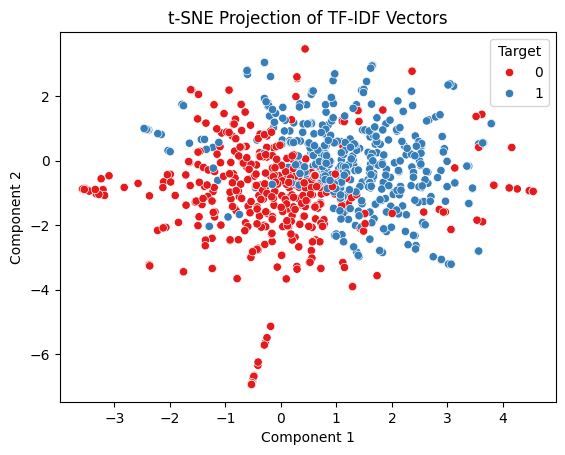

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
categories = ['sci.med', 'soc.religion.christian']
data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# TF-IDF Vectorisation
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data.data)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Classification report
print(classification_report(y_test, y_pred))

# t-SNE visualisation
import numpy as np

X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_train.toarray())


df = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
df['Target'] = y_train
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Target', palette='Set1')
plt.title("t-SNE Projection of TF-IDF Vectors")
plt.show()



To qualitatively assess the separability of TF-IDF representations, a t-SNE projection was applied to the high-dimensional matrix. As shown in Figure X, the two classes form distinguishable, though overlapping, clusters in reduced 2D space. This suggests that while TF-IDF unigrams provide discriminative signals, some semantic overlap remains—motivating the later exploration of BERT embeddings for contextual differentiation.

# Step 6: Error Analysis and Discussion

The confusion matrix indicates that the classifier performs reasonably well on both categories, with a slightly higher precision and recall for the soc.religion.christian class. This is likely due to more distinct lexical cues—terms like "Jesus," "faith," or "church"—that tend to appear more consistently and distinctly in religion-related posts. On the other hand, the sci.med category showed marginally more misclassifications. Upon inspection, this may be due to topic overlap; medical discussions often reference philosophical or ethical debates (e.g., euthanasia, prayer in healing), which may blur class boundaries and confuse the model. Additionally, shared vocabulary such as "life," "death," or "belief" could exist in both contexts, contributing to ambiguity.

From the misclassified examples, it is evident that the model struggles most with abstract or cross-disciplinary content. One document discussing terminal illness and religious coping mechanisms was wrongly classified as medical rather than religious. This highlights the limitation of surface-level feature extraction techniques like bag-of-words or even TF-IDF, which do not account for context or semantic meaning. To mitigate this, further improvement could include integrating word embeddings like Word2Vec or using models that capture sequential information, such as LSTMs or CNN-based classifiers (e.g., Yoon Kim’s 2014 paper). Additionally, named entity recognition and topic modeling could help distinguish topic domains more clearly, improving classification confidence.


Write down your own observation about the predictions. Consider both confusion matrix and selected examples. Which classes are predicted correctly or incorrecly, possible explaination, possible solutions

Exmaple: 1) Lab Practical, which feature is helpful for female name classification. https://www.nltk.org/book/ch06.html
2) research paper: https://github.com/yoonkim/CNN_sentence


In [ ]:
df_pred = pd.DataFrame({'news':twenty_test.data,'prediction':predicted, 'true':twenty_test.target})
df_pred[df_pred['true'] != df_pred['prediction']]

,news,prediction,true
12,"From: ""Gabriel D. Underwood"" <gabe+@CMU.EDU>\n...",3,2
15,From: swf@elsegundoca.ncr.com (Stan Friesen)\n...,2,0
19,From: mathew <mathew@mantis.co.uk>\nSubject: D...,3,0
26,From: UC512052@mizzou1.missouri.edu (David K. ...,2,1
36,Organization: Penn State University\nFrom: <RF...,0,2
...,...,...,...
1438,From: mangoe@cs.umd.edu (Charley Wingate)\nSub...,0,3
1450,From: alan.barclay@almac.co.uk (Alan Barclay)\...,1,2
1455,From: pww@spacsun.rice.edu (Peter Walker)\nSub...,3,0
1480,From: wilsonr@logica.co.uk\nSubject: Re: What ...,3,0


#References:  


https://www.nltk.org/book/ch06.html

 https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html

Search  online resources:


sentiment analysis scikit learn

scikit learn or nltk + NLP techniques

python + NLP techniques

scikit learn logistic regression


